# Expressions EXPERT

Esta tabla contiene la información a nivel de expression EXPERT. --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'expression__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('expressions')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-14 18:10:06.991311 Data cache files found ...
2024-05-14 18:10:06.991311 Data cache files successfully loaded!!
The dataset contains 1591 (98.88%) instances for BEGINNER class and 18 (1.119%) for EXPERT class.


In [1]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'expressions'
TABLE_FEATURES = ['expression__category','expression__parent','expression__first_child_category','expression__second_child_category','expression__third_child_category','expression__fourth_child_category','expression__expression_role','expression__height','expression__depth','expression__expertise_level']
TABLE_TARGET = 'expression__expertise_level'

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. Each of the instances corresponds to a program. For each program we have {X.shape[1]} attributes.')

2024-05-14 19:08:43.410896 Data cache files found ...
2024-05-14 19:09:51.114403 Data cache files successfully loaded!!
Features shape: (8102385, 10)
Target shape: (8102385,)
As we can see the downloaded data contains a total of 8102385 instances. Each of the instances corresponds to a program. For each program we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8102385 entries, 0 to 8102384
Data columns (total 10 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   expression__category               object
 1   expression__parent                 object
 2   expression__first_child_category   object
 3   expression__second_child_category  object
 4   expression__third_child_category   object
 5   expression__fourth_child_category  object
 6   expression__expression_role        object
 7   expression__height                 int64 
 8   expression__depth                  int64 
 9   expression__expertise_level        object
dtypes: int64(2), object(8)
memory usage: 618.2+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 8102385 entries, 0 to 8102384
Series name: expression__expertise_level
Non-Null Count    Dtype 
--------------    ----- 
8102385 non-null  object
dtypes: object(1)
memory usage: 61.8+ MB
None


Cómo podemos ver la tabla está compuesta por 2 variables numéricas y 8 de tipo objeto (cetegoricas). Una de ellas es la clase con la que se ha etiquetado la instancia. Sin embargo, en algunas ocasiones esta última clase no la vamos a utilizar. Por ejemplo, si queremos obtener clusters por medio de aprendizaje no supervisado.

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 42.52% instances for BEGINNER class and 57.48% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [98.31%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos. Si los hubiese la siguiente función los mostraría.

In [6]:
print_empty_cols(X)

### 2.4 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
expression__category,8102385,39,Variable,2782098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__parent,8102385,49,Call,1929892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__first_child_category,2888731,38,Variable,1447334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__second_child_category,1357651,36,Variable,449233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__third_child_category,402990,37,StringLiteral,123449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__fourth_child_category,137818,34,Variable,37395,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__expression_role,8102385,79,CallArg,1096702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__height,8102385.0,NaN,NaN,NaN,5.169738,2.227696,1.0,4.0,5.0,6.0,83.0
expression__depth,8102385.0,NaN,NaN,NaN,0.602559,1.086327,0.0,0.0,0.0,1.0,81.0
expression__expertise_level,8102385,2,EXPERT,4656866,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias). Revisar programa con 3k modulos y 1k paquetes.

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "expression__height": [(1, 3), (3, 4), (4, 5), (5, 6) ,(6, 7), (7, inf)],  # min: 1 max: 83
    "expression__depth": [(0, 1), (1, 2), (2, inf)],  # min: 1 max: 81
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['expression__category'], 10))
print(get_statistics(X_copy, ['expression__parent'], 10))
print(get_statistics(X_copy, ['expression__first_child_category'], 10))
print(get_statistics(X_copy, ['expression__second_child_category'], 10))
print(get_statistics(X_copy, ['expression__third_child_category'], 10))
print(get_statistics(X_copy, ['expression__fourth_child_category'], 10))
print(get_statistics(X_copy, ['expression__expression_role'], 10))
print(get_statistics(X_copy, ['expression__height'], 10))
print(get_statistics(X_copy, ['expression__depth'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['expression__category', 'expression__expression_role'], 10))
print(get_statistics(X_copy, ['expression__category', 'expression__parent'], 10))
print(get_statistics(X_copy, ['expression__parent', 'expression__expression_role'], 10))


# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['expression__category', 'expression__first_child_category', 'expression__second_child_category'], 10))


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

In [10]:
# Con estos datos (8102385, 316) la matriz de confusion es demasiado grande.
# sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
Una vez sabemos qué datos contiene la tabla, analizaremos los valores que toma cada una de las variables de cada instancia. El objetivo es identificar posibles valores atípicos que nos dificulten la realización de futuras tareas. 
Tras su análisis, se puede concluir que un valor:
    - **Es erróneo**. En este caso hay que tomar una decisión para cada caso, siendo los tratamientos más extendidos son listwise, pairwise, drop variables, mean/median imputation, most frequent, separate category, zero imputation, cold deck, hot deck,(stochastic) regression, k-NN and multiple imputation. Los resultados de imputación regresiva, k-NN y múltiple dan buenos resultados, aunque, como se ha indicado, es necesario el estudio en cada caso.
    - **Es correcto, pero anómalo**. Se documenta su existencia para su posible discusión y se mantiene en el dataset. En estos casos se hace necesaria la utilización de algoritmos y estadísticos que no sean muy sensibles a dichos valores anómalos.

## Univariate
Para cada uno de los atributos se debe realizar un análisis y detección de valores atípicos, estudiando su posible causa. 
Existen diversas formas de calcular los valores anómalos. 

### Variables numéricas
Para las variables numéricas, se suele identificar: 
    - a) Valor atípico leve es el que está fuera de $[Q1 - 1.5IQR, Q3 + 1.5IQR]$, donde $IQR = Q3-Q1$.
    - b) Valor atípico extremo está fuera de $[Q1 - 3IQR, Q3 + 3IQR]$.

La idea es probar con a) y si hay pocas instancias analizarlas. Si hubiese muchas, mirar b) y analizar si fuesen pocas. No hay un algoritmo o método estipulado, puesto que depende del dominio del problema y de los datos.

Los límites de Tukey se basan en los cuartiles de los datos y son sensibles a la presencia de sesgo en la distribución. Cuando hay asimetría en los datos, los límites de Tukey pueden no ser tan efectivos para identificar outliers de manera equitativa en ambos extremos de la distribución. El Coeficiente de Medcouple es útil para identificar la asimetría en los datos, especialmente en presencia de valores atípicos o sesgados. Es una medida robusta porque no se ve tan afectada por valores extremos como la media y la desviación estándar. El MC puede proporcionar información adicional sobre la asimetría de la distribución, lo que te permite ajustar los límites de Tukey de manera más apropiada para tu conjunto de datos específico. Una posible variacion de los límites de Tukey teniendo en cuenta MC podria ser: 
   - Si MC es mayor que 0 (asimetría hacia la derecha):
      - low = (q1-1.5 * math.exp(-4*mc) * iqr)
      - high = (q3+1.5 * math.exp(3.5*mc) * iqr)
   - Si la asimetriza es hacia la izquierda:    
      - low = (q1-1.5 * math.exp(-3.5*mc) * iqr)
      - high = (q3+1.5 * math.exp(4*mc) * iqr)


### Variables categóricas
Para las variables categóricas no existe el concepto de valor anómalo, pero sí se puede considerar en base a un análisis de frecuencia. Por ejemplo, que el uso de una categoría sea residual, pudiendo tener un 0.1% de instancias en el dataset. Para detectar estos valores, se puede fijar un valor mínimo de frecuencia en función del número posible de valores de la variable categórica (2 en el caso de una variable booleana). Por ejemplo, un umbral de $\frac{0.2\%}{valores}$ (0.1% en el caso de una variable booleana)

## Analisis detallado de variables
Para cada una de las 9 variable (7 categoricas y 2 numericas) se hara un analisis detallado 

### Variable category (1/9)
Esta variable es de tipo categorica y representa la categoria de la expresion.

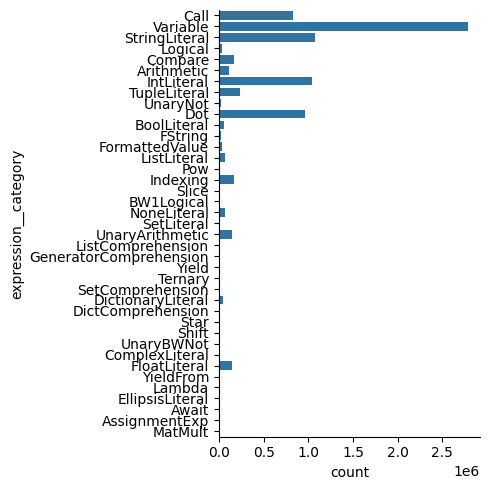

In [5]:
sns.catplot(full_table['expression__category'], kind="count")

In [12]:
print_frequency_anal_for_cat_var(full_table, 'expression__category')

### Variable parent (2/9)
Esta variable es de tipo categorica y representa la categoria del padre de la expresion.

In [ ]:
sns.catplot(full_table['expression__parent'], kind="count")

In [12]:
print_frequency_anal_for_cat_var(full_table, 'expression__parent')

### Variable first_child_category (3/9)
Esta variable es de tipo categorica y representa la categoria del primer hijo de la expresion.

In [ ]:
sns.catplot(full_table['expression__first_child_category'], kind="count")

In [12]:
print_frequency_anal_for_cat_var(full_table, 'expression__first_child_category')

### Variable second_child_category (4/9)
Esta variable es de tipo categorica y representa la categoria del segundo hijo de la expresion.

In [ ]:
sns.catplot(full_table['expression__second_child_category'], kind="count")

In [12]:
print_frequency_anal_for_cat_var(full_table, 'expression__second_child_category')

### Variable third_child_category (5/9)
Esta variable es de tipo categorica y representa la categoria del tercer hijo de la expresion.

In [ ]:
sns.catplot(full_table['expression__third_child_category'], kind="count")

In [12]:
print_frequency_anal_for_cat_var(full_table, 'expression__third_child_category')

### Variable fourth_child_category (6/9)
Esta variable es de tipo categorica y representa la categoria del cuarto hijo de la expresion.

In [ ]:
sns.catplot(full_table['expression__fourth_child_category'], kind="count")

In [12]:
print_frequency_anal_for_cat_var(full_table, 'expression__fourth_child_category')

### Variable expression_role (7/9)
Esta variable es de tipo categorica y representa el rol de la expresion en su padre.

In [ ]:
sns.catplot(full_table['expression__expression_role'], kind="count")

In [12]:
print_frequency_anal_for_cat_var(full_table, 'expression__expression_role')

### Variable height (8/9)
Esta variable representa la distancia de la expresión al root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 87. Con una media de 5.169.

<Axes: ylabel='statement__height'>

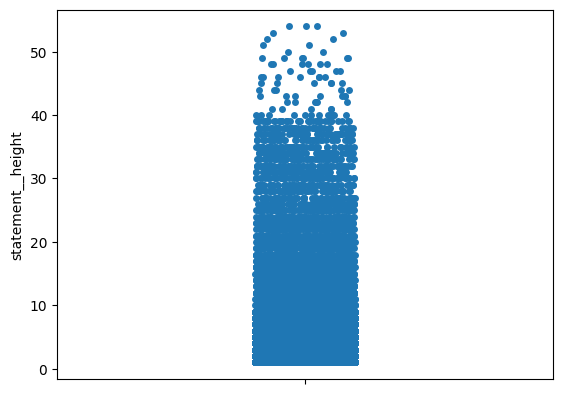

In [27]:
sns.stripplot(X['expression__height'])

In [8]:
print_outliers_for_df_column(X, 'expression__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8653156883631834
Rango valores atípicos extremos (Tukey): [-2.0,12.0]
Rango valores atípicos leves (Tukey): [1.0,9.0]
Rango valores atípicos extremos (Fixed BoxPlot): [3.8548507304062483,101.57153666735599]
-3.0IQR: 0 instancias tienen un valor para expression__height inferior a -2.0 (Q1-3*IQR) para expression__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para expression__height inferior a 1.0 (Q1-1.5*IQR) para expression__height. Representando un 0.0% del total de instancias.
+1.5IQR: 261397 instancias tienen un valor para expression__height superior a 9.0 (Q3+1.5*IQR) para expression__height. Representando un 3.226% del total de instancias.
+3.0IQR: 56889 instancias tienen un valor para expression__height superior a 12.0 (Q3-3*IQR) para expression__height. Representando un 0.7021% del total de instancias.
L: 1365633 instancias tienen un valor para expression__height inferior a 

In [29]:
X[X['expression__height'] > 12].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__category,statement__parent,statement__statement_role,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
count,6054,6054,6054,6054.000000,6054.000000,2249,2253.000000,6054
unique,17,8,11,NaN,NaN,2,NaN,2
top,AssignmentStmt,If,IfBody,NaN,NaN,True,NaN,BEGINNER
freq,2329,5599,3572,NaN,NaN,1516,NaN,3550
mean,NaN,NaN,NaN,16.970763,4.782293,NaN,1.823347,NaN
std,NaN,NaN,NaN,7.836486,5.582493,NaN,1.402499,NaN
min,NaN,NaN,NaN,11.000000,0.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,11.000000,2.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,13.000000,3.000000,NaN,1.000000,NaN
75%,NaN,NaN,NaN,19.000000,5.000000,NaN,2.000000,NaN


### Variable depth (9/9)
Esta variable representa la distancia desde la expresion hasta una hoja del ast. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 81. Con una media de 0.60.

<Axes: ylabel='statement__depth'>

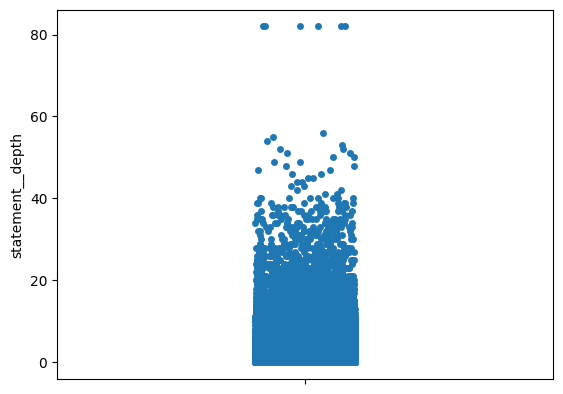

In [30]:
sns.stripplot(X['expression__depth'])

In [7]:
print_outliers_for_df_column(X, 'expression__depth')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.579330862787257
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.1974652002075085,16.222712549546234]
-3.0IQR: 0 instancias tienen un valor para expression__depth inferior a -3.0 (Q1-3*IQR) para expression__depth. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para expression__depth inferior a -1.5 (Q1-1.5*IQR) para expression__depth. Representando un 0.0% del total de instancias.
+1.5IQR: 474914 instancias tienen un valor para expression__depth superior a 2.5 (Q3+1.5*IQR) para expression__depth. Representando un 5.861% del total de instancias.
+3.0IQR: 68139 instancias tienen un valor para expression__depth superior a 4.0 (Q3-3*IQR) para expression__depth. Representando un 0.841% del total de instancias.
L: 0 instancias tienen un valor para expression__depth inferior a -0.1974652002075

In [32]:
X[X['expression__depth'] > 4].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__category,statement__parent,statement__statement_role,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
count,1732,1732,1732,1732.000000,1732.000000,1620,1625.000000,1732
unique,8,9,13,NaN,NaN,2,NaN,2
top,If,If,IfElseBody,NaN,NaN,True,NaN,BEGINNER
freq,1366,1116,971,NaN,NaN,1198,NaN,953
mean,NaN,NaN,NaN,7.739607,19.975173,NaN,3.207385,NaN
std,NaN,NaN,NaN,7.376308,8.001947,NaN,7.810215,NaN
min,NaN,NaN,NaN,1.000000,14.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,3.000000,15.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,5.000000,17.000000,NaN,2.000000,NaN
75%,NaN,NaN,NaN,10.000000,22.000000,NaN,3.000000,NaN


## Multivariate

TODO: isolation forest algorithm

In [13]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012

isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.to_numpy())
mask = isof_prediction == -1
multivar_outliers = X[mask].index.tolist()
full_table.iloc[multivar_outliers]